# AirBNB

## by Julia Gilly

## 1. Questions

- *What parameters influence the Price?*
- *Are the reviews relevant for a better price?*
- *Is there a way to pedict the price for a new AirBNB room?*

In [337]:
#import all packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

## 2. Data Wrangling

### 2.1 Gather necessary data

In [338]:
#Boston data

df_B_calender = pd.read_csv('Boston/calendar.csv')
df_B_listing = pd.read_csv('Boston/listings.csv')
df_B_review = pd.read_csv('Boston/reviews.csv')

In [339]:
# Seattle data

df_S_calender = pd.read_csv('Seattle/calendar.csv')
df_S_listing = pd.read_csv('Seattle/listings.csv')
df_S_review = pd.read_csv('Seattle/reviews.csv')

In [340]:
df_B_listing.shape

(3585, 95)

In [341]:
df_S_listing.shape

(3818, 92)

In [342]:
# put listings data together so that the two cities  are comparable

df_list = pd.concat([df_B_listing, df_S_listing], axis =0)

In [343]:
df_list.shape

(7403, 95)

*Finding: Data from Boston has three more coloumns than data formm Seattle*

### 2.2 Assess data

In [344]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 3817
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7403 non-null   int64  
 1   listing_url                       7403 non-null   object 
 2   scrape_id                         7403 non-null   int64  
 3   last_scraped                      7403 non-null   object 
 4   name                              7403 non-null   object 
 5   summary                           7083 non-null   object 
 6   space                             5777 non-null   object 
 7   description                       7403 non-null   object 
 8   experiences_offered               7403 non-null   object 
 9   neighborhood_overview             4956 non-null   object 
 10  notes                             3822 non-null   object 
 11  transit                           5179 non-null   object 
 12  access

In [345]:
#find the missing columns in Seattle
list_B = df_B_listing.columns

for i in list_B:
    if i in df_S_listing.columns:
        next
    else: 
        print(i)

access
interaction
house_rules


In [346]:
#closer look at boston
df_B_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [347]:
df_list.requires_license.value_counts()

f    7403
Name: requires_license, dtype: int64

In [348]:
df_list.state.value_counts()

WA    3817
MA    3585
wa       1
Name: state, dtype: int64

In [349]:
df_list.cleaning_fee.isnull().sum()

2137

In [350]:
df_list.host_url.value_counts()

https://www.airbnb.com/users/show/30283594    138
https://www.airbnb.com/users/show/25188        79
https://www.airbnb.com/users/show/4962900      64
https://www.airbnb.com/users/show/9419684      61
https://www.airbnb.com/users/show/12243051     58
                                             ... 
https://www.airbnb.com/users/show/61571632      1
https://www.airbnb.com/users/show/12832332      1
https://www.airbnb.com/users/show/20450031      1
https://www.airbnb.com/users/show/27656377      1
https://www.airbnb.com/users/show/23635078      1
Name: host_url, Length: 4929, dtype: int64

In [351]:
def plot_def (col):
    base_color = sb.color_palette()[0]

    plt.figure(figsize=[5,5])

    sb.countplot(data = df_list, y = col, color = base_color);

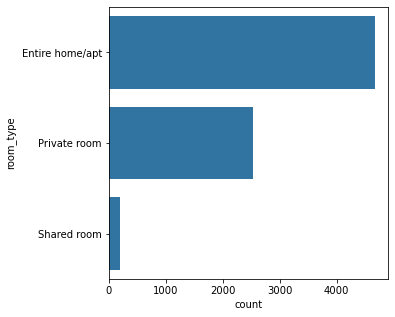

In [352]:
#plot count of room_type
plot_def('room_type')

In [353]:
df_list.room_type.isnull().sum()

0

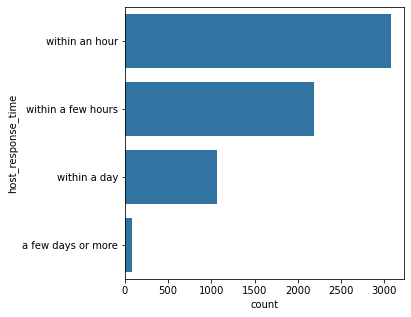

In [354]:
plot_def('host_response_time')

In [355]:
df_list.cancellation_policy.value_counts()

strict             2999
moderate           2170
flexible           2149
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [356]:
df_list.bedrooms.isnull().sum()

16

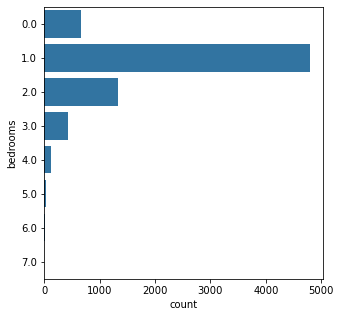

In [357]:
plot_def('bedrooms')

In [358]:
df_list.beds.isnull().sum()

10

In [359]:
df_list.beds.value_counts()

1.0     4366
2.0     1865
3.0      708
4.0      258
5.0      113
6.0       37
7.0       22
8.0       10
9.0        6
0.0        4
10.0       2
15.0       1
16.0       1
Name: beds, dtype: int64

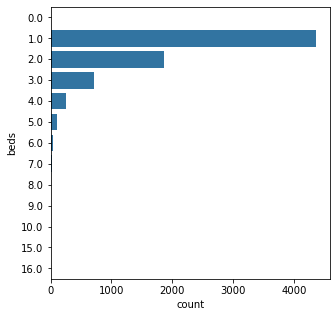

In [360]:
plot_def('beds')

In [361]:
df_list.neighbourhood.isnull().sum()

959

In [362]:
df_list.instant_bookable.isnull().sum()

0

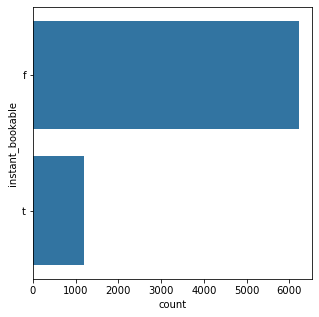

In [363]:
plot_def('instant_bookable')

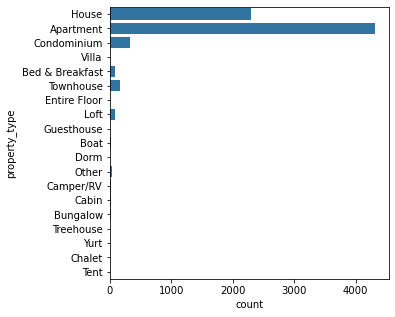

In [364]:
plot_def('property_type')

In [365]:
df_list.neighbourhood_cleansed.value_counts()

Broadway             397
Jamaica Plain        343
South End            326
Back Bay             302
Fenway               290
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 111, dtype: int64

In [366]:
df_list.neighbourhood_cleansed.isnull().sum()

0

In [367]:
df_list.neighbourhood_group_cleansed.isnull().sum()

3585

In [368]:
df_list.neighbourhood_group_cleansed.value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [369]:
#check if some rows are duplicated 
df_list.duplicated().sum()

0

In [370]:
#check if host_id is duplicated
df_list.host_id.duplicated().sum()

2474

In [371]:
df_list[df_list.host_id.duplicated() == True].host_id.value_counts()

30283594    137
25188        78
4962900      63
9419684      60
12243051     57
           ... 
2844298       1
73359         1
7980977       1
39845529      1
884747        1
Name: host_id, Length: 877, dtype: int64

In [372]:
df_list[df_list.host_id==30283594].state.value_counts()

MA    136
WA      2
Name: state, dtype: int64

**intresting is that one of the host seems to have appartments/rooms in two different citys**

In [373]:
#closer look at minimum nights
df_list.minimum_nights.value_counts()

1       3036
2       2421
3       1095
4        248
7        174
5        162
10        70
14        41
30        35
6         34
15        21
20        19
28         8
32         4
60         4
21         4
13         3
25         3
9          2
8          2
11         2
27         2
90         2
23         1
29         1
26         1
18         1
273        1
17         1
1000       1
300        1
200        1
12         1
31         1
Name: minimum_nights, dtype: int64

**Observations**

- *there seems to be at least one row in the dataset without any data (license)*
- *there are columns without information in the Boston dataset (for example: has_availability, neighbourhood_group_cleansed, jurisdiction_names)*
- *there are columns which do not give you furter information (all the same data, for example: requires_license contains only 'f')*
- *there are columns in the Boston data set which cannot be found in the Seattle data set (access, interaction, house_rules)*
- *in state column there is 1 "wrong" state (it is written in small letters 'wa')*
- *missing values in some columns (for example: cleaning_fee, bedrooms)*
- *for the purpose of this investigation all columns with an url don't seem to be interesting (for example: host_url)*
- *0 beds seems to be wrong. there should be at least 1*
- *double info in the columns with neighbourhood*
- *the column minimum_nights seems to hold wrong numbers (for example: 1000 nights as a minimum seem to be wrong)*
- *price is not a float*

### 2.3. Clean data

#### 2.3.1 unnecessary columns

- *row without data and information or not intresting for this investigation --> license, requires_license, +_url*
- *double info in the columns with neighbourhood --> neighbourhood, neighbourhood_group_cleansed are not necessary* 
- *there are columns without information in the Boston dataset (for example: has_availability, neighbourhood_group_cleansed, jurisdiction_names)*
- *there are columns in the Boston data set which cannot be found in the Seattle data set (access, interaction, house_rules)*

**Solution: drop those columns**

In [374]:
#find all with url

url = [col for col in df_list.columns if 'url' in col]
print(url)

['listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url']


In [375]:
df_list_clean = df_list.drop(columns=url)

In [376]:
df_list_clean = df_list_clean.drop(columns=['license', 'requires_license', 'neighbourhood', 'neighbourhood_group_cleansed', 'has_availability', 'jurisdiction_names', 'access', 'interaction', 'house_rules'])

**Check**

In [377]:
df_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7403 entries, 0 to 3817
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7403 non-null   int64  
 1   scrape_id                         7403 non-null   int64  
 2   last_scraped                      7403 non-null   object 
 3   name                              7403 non-null   object 
 4   summary                           7083 non-null   object 
 5   space                             5777 non-null   object 
 6   description                       7403 non-null   object 
 7   experiences_offered               7403 non-null   object 
 8   neighborhood_overview             4956 non-null   object 
 9   notes                             3822 non-null   object 
 10  transit                           5179 non-null   object 
 11  host_id                           7403 non-null   int64  
 12  host_n

#### 2.3.2 wrong state

*in state column there is 1 "wrong" state (it is written in small letters 'wa')*

**Solution: change 'wa' to 'WA'**

In [378]:
df_list_clean.state = df_list_clean.state.replace('wa', 'WA')

**Check**

In [379]:
df_list_clean.state.value_counts()

WA    3818
MA    3585
Name: state, dtype: int64

#### 2.3.3 wrong values

*minimum_nights with values above 90 (which is already 3 months and this is the normal amount of time for notification to the landlord) seem to be wrong*

**Solution: drop the lines with more than 90 minimum_nights**

In [380]:
df_list_clean = df_list_clean[df_list_clean.minimum_nights <= 90]

In [381]:
df_list_clean.minimum_nights.value_counts()

1     3036
2     2421
3     1095
4      248
7      174
5      162
10      70
14      41
30      35
6       34
15      21
20      19
28       8
32       4
60       4
21       4
25       3
13       3
90       2
9        2
11       2
8        2
27       2
17       1
18       1
26       1
29       1
12       1
23       1
31       1
Name: minimum_nights, dtype: int64

*0 beds seem to be wrong for an AirBNB*

**Solution: change it to 1 bed**

In [382]:
df_list_clean.beds = df_list_clean.beds.replace(0, 1)

In [383]:
df_list_clean.beds.value_counts()

1.0     4367
2.0     1864
3.0      708
4.0      258
5.0      113
6.0       37
7.0       22
8.0       10
9.0        6
10.0       2
15.0       1
16.0       1
Name: beds, dtype: int64

#### 2.3.4 Missing values

*missing values in beds*

**Solution: replace it with 1**

In [384]:
df_list_clean.fillna(({'beds': 1}), inplace = True)

**Check**

In [385]:
df_list_clean.beds.isnull().sum()

0

*missing values in cleaning_fee*

**Solution: use median of cleaning_fee for missing values**

In [386]:
#cleaning fee is an object --> mean can't be calculated with object --> substract it and make an int out of it
fee = df_list_clean.dropna(subset = ['cleaning_fee']).cleaning_fee.str.slice(1,9).astype(float).median()

In [387]:
df_list_clean.fillna({'cleaning_fee' : '$'+str(fee)+'0'}, inplace = True)

In [388]:
df_list_clean.cleaning_fee.value_counts()

$50.00     2770
$100.00     522
$25.00      455
$20.00      307
$10.00      285
           ... 
$210.00       1
$14.00        1
$179.00       1
$87.00        1
$240.00       1
Name: cleaning_fee, Length: 132, dtype: int64

**Check**

In [389]:
df_list_clean.cleaning_fee.isnull().sum()

0

*missing values in bedrooms*

In [390]:
#with at least 1 bathroom i expect also a bedroom
df_list_clean[df_list_clean['bedrooms'].isnull() == True].bathrooms.value_counts()

1.0    16
Name: bathrooms, dtype: int64

**Solution: at least 1 bedroom**

In [391]:
df_list_clean.fillna({'bedrooms' : 1}, inplace = True)

**Check**

In [392]:
df_list_clean.bedrooms.isnull().sum()

0

*missing value in bathrooms*

In [393]:
#with at least 1 bedroom i expect also a bathroom
df_list_clean[df_list_clean['bathrooms'].isnull() == True].bedrooms.value_counts()

1.0    26
2.0     4
Name: bedrooms, dtype: int64

**Solution: at least 1 bathroom**

In [394]:
df_list_clean.fillna({'bathrooms' : 1}, inplace = True)

**Check**

In [395]:
df_list_clean.bathrooms.isnull().sum()

0

In [396]:
df_list_clean.bedrooms.value_counts()

1.0    4809
2.0    1332
0.0     659
3.0     438
4.0     114
5.0      40
6.0       6
7.0       1
Name: bedrooms, dtype: int64

*price is not a float*

**Solution: change price to float**

In [397]:
df_list_clean.price.value_counts()

$150.00    305
$100.00    260
$75.00     212
$200.00    191
$65.00     180
          ... 
$248.00      1
$244.00      1
$536.00      1
$673.00      1
$326.00      1
Name: price, Length: 366, dtype: int64

In [398]:
df_list_clean['price'] = df_list_clean.price.str.replace(',', '')

In [399]:
df_list_clean['price'] = df_list_clean.price.str.extract('(\d+)').astype(float)


**Check**

In [400]:
df_list_clean[df_list_clean['id'] == 6093430].price

793    1400.0
Name: price, dtype: float64

## 3. Explore

### 3.1 What influences the price?

*At first let's have a closer look at the price?*

In [401]:
def myHistPlot(df, xVar, bins):
    #use this function for all the HistPlots in the notebook
    plt.hist(data=df, x=xVar, bins = bins, edgecolor = 'black')
    plt.xlabel(xVar.title())
    plt.ylabel('Frequency'.title())
    plt.title(f'Distribution of {xVar}'.title(), fontsize=14, weight='bold')

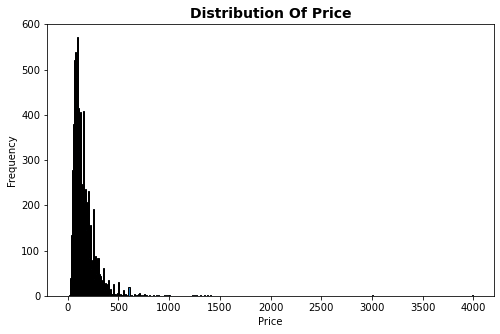

In [402]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(0, df_list_clean['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

myHistPlot(df_list_clean, 'price', bins)

*most of the data seems to be on the left --> check without outliners (5%)*

In [403]:
df_list_clean['price'].quantile(0.95)

349.0

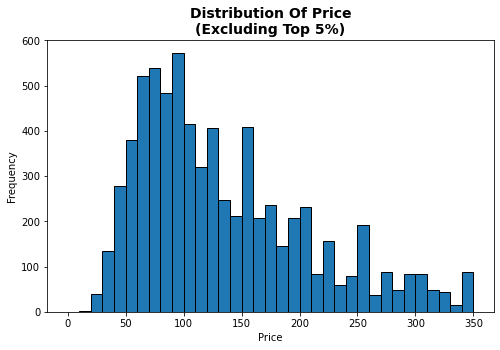

In [404]:
#without outliers (5%)

binsize = 10
bins = np.arange(0, df_list_clean['price'].quantile(0.95)+binsize, binsize)

plt.figure(figsize=[8,5])

myHistPlot(df_list_clean, 'price', bins)
plt.title('Distribution of price\n(excluding top 5%)'.title(), fontsize=14, weight='bold');

*for further investigation I will exclude the outliners in price*

In [405]:
df_clean_sub = df_list_clean[df_list_clean['price'] <= 349]

**look at state**

In [406]:
df_clean_sub.price.describe()

count    7038.000000
mean      132.127025
std        71.573517
min        10.000000
25%        75.000000
50%       115.000000
75%       175.000000
max       349.000000
Name: price, dtype: float64

In [407]:
#create a classfication for the price
list_price= ['low', 'middle_low', 'middle_high', 'high']

df_clean_sub['price_seg'] = pd.cut(df_clean_sub['price'], [0,75,115,175,350], labels=list_price)

<ipython-input-407-9fba9d4de081>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_sub['price_seg'] = pd.cut(df_clean_sub['price'], [0,75,115,175,350], labels=list_price)


In [408]:
def myplt (df, xval, huevar):
    sb.countplot(data=df, x = xval , hue=huevar)
    plt.legend(bbox_to_anchor=(1.02, 0.15), loc='upper left', borderaxespad=0, title = huevar)
    
    plt.title(f'Influence {xval} on {huevar}'.title(), fontsize=14, weight='bold')

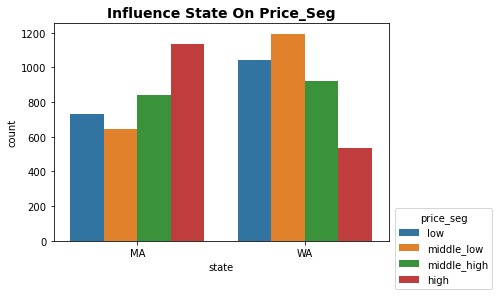

In [409]:
myplt(df_clean_sub, 'state', 'price_seg')

*Boston has the higher prices --> city is influencial for price*

**look at beds**

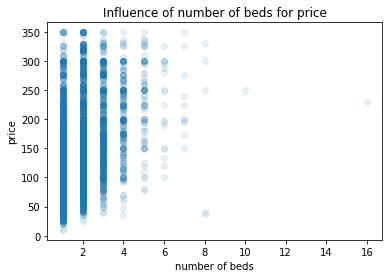

In [410]:
plt.scatter(data = df_clean_sub, x = 'beds', y = 'price', alpha = 1/10)
plt.xlabel('number of beds')
plt.ylabel('price')
plt.title('Influence of number of beds for price');

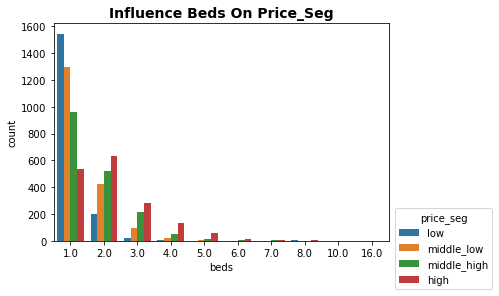

In [411]:
myplt(df_clean_sub, 'beds', 'price_seg')

*if there is more than one bed it is more likely that the price is higher --> number of beds are influencial for pirce*

**look at bedrooms**

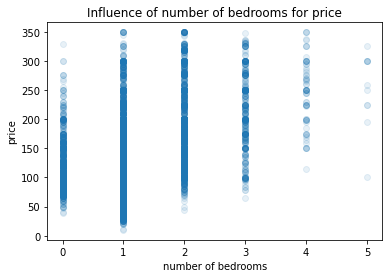

In [412]:
plt.scatter(data = df_clean_sub, x = 'bedrooms', y = 'price', alpha = 1/10)
plt.xlabel('number of bedrooms')
plt.ylabel('price')
plt.title('Influence of number of bedrooms for price');

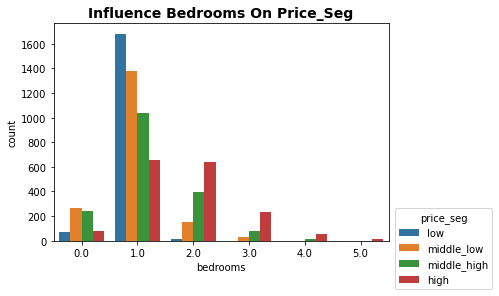

In [413]:
myplt(df_clean_sub, 'bedrooms', 'price_seg')

*number of bedrooms is influencial for price as well*

**look at bathrooms**

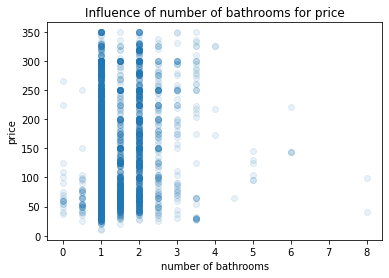

In [414]:
plt.scatter(data = df_clean_sub, x = 'bathrooms', y = 'price', alpha = 1/10)
plt.xlabel('number of bathrooms')
plt.ylabel('price')
plt.title('Influence of number of bathrooms for price');

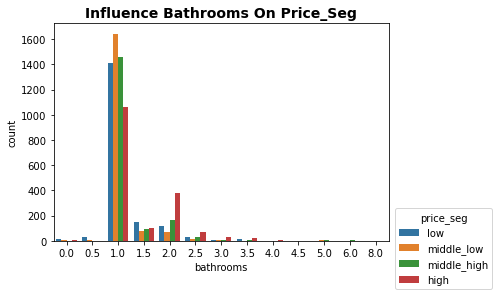

In [415]:
myplt(df_clean_sub, 'bathrooms', 'price_seg')

*number of bathrooms is influencial for price as well (especially interesting: 2 bathrooms seem to have much  more high price seg.)*

**look at cleaning_fee**

In [416]:
df_clean_sub['cleaning_fee'] = df_clean_sub.cleaning_fee.str.extract('(\d+)').astype(float)

<ipython-input-416-bc9f3e75cefa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_sub['cleaning_fee'] = df_clean_sub.cleaning_fee.str.extract('(\d+)').astype(float)


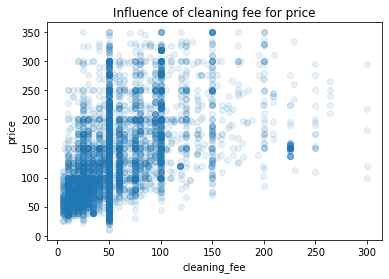

In [417]:
plt.scatter(data = df_clean_sub, x = 'cleaning_fee', y = 'price', alpha = 1/10)
plt.xlabel('cleaning_fee')
plt.ylabel('price')
plt.title('Influence of cleaning fee for price');

*cleaning_fee might be influencial for price as well*

**look at bed_type in additon to beds**

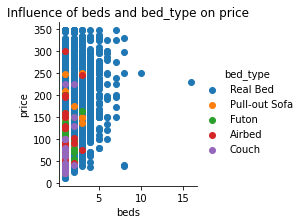

In [418]:
g = sb.FacetGrid(data = df_clean_sub, hue= 'bed_type')
g.map(plt.scatter, 'beds', 'price')
g.add_legend()
plt.title('Influence of beds and bed_type on price');

*might be influencial as well*

### 3.2 Are the reviews relevant for a higher price?

In [419]:
df_clean_sub.number_of_reviews.value_counts()

0      1286
1       649
2       451
3       313
4       305
       ... 
140       1
353       1
297       1
277       1
319       1
Name: number_of_reviews, Length: 230, dtype: int64

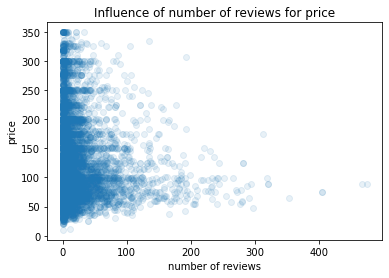

In [420]:
plt.scatter(data = df_clean_sub, x = 'number_of_reviews', y = 'price', alpha = 1/10)
plt.xlabel('number of reviews')
plt.ylabel('price')
plt.title('Influence of number of reviews for price');

**review_scores_value**

In [421]:
df_clean_sub.review_scores_value.value_counts()

10.0    2832
9.0     2171
8.0      485
7.0       84
6.0       62
4.0       16
2.0        8
5.0        3
3.0        2
Name: review_scores_value, dtype: int64

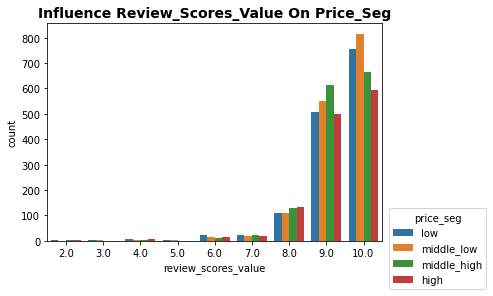

In [422]:
myplt(df_clean_sub, 'review_scores_value', 'price_seg')

**review_scores_rating**

In [423]:
df_clean_sub.review_scores_rating.value_counts()

100.0    1319
96.0      461
98.0      425
97.0      421
95.0      418
93.0      378
94.0      297
90.0      289
80.0      261
92.0      205
99.0      195
91.0      177
87.0      135
88.0      111
89.0      105
86.0       60
85.0       59
84.0       53
60.0       44
83.0       41
82.0       26
70.0       25
75.0       19
73.0       18
40.0       15
78.0       15
77.0       13
79.0       12
76.0       11
81.0       10
20.0        7
71.0        6
67.0        6
64.0        6
74.0        6
72.0        5
68.0        4
66.0        4
50.0        3
65.0        3
55.0        2
47.0        2
53.0        2
62.0        1
48.0        1
46.0        1
69.0        1
58.0        1
57.0        1
Name: review_scores_rating, dtype: int64

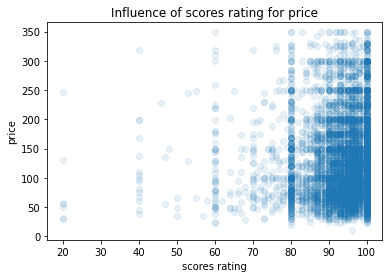

In [424]:
plt.scatter(data = df_clean_sub, x = 'review_scores_rating', y = 'price', alpha = 1/10)
plt.xlabel('scores rating')
plt.ylabel('price')
plt.title('Influence of scores rating for price');

**reviews_per_month**

In [425]:
df_clean_sub.reviews_per_month.value_counts()

1.00     179
2.00      97
0.23      44
3.00      41
0.36      41
        ... 
9.67       1
8.31       1
9.38       1
12.15      1
7.30       1
Name: reviews_per_month, Length: 786, dtype: int64

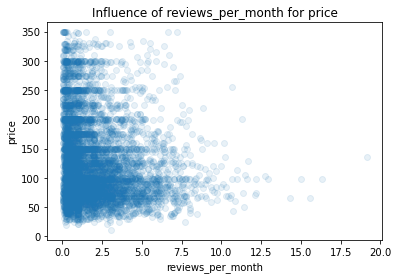

In [426]:
plt.scatter(data = df_clean_sub, x = 'reviews_per_month', y = 'price', alpha = 1/10)
plt.xlabel('reviews_per_month')
plt.ylabel('price')
plt.title('Influence of reviews_per_month for price');

**last_review**

In [427]:
df_clean_sub.last_review.value_counts()

2016-09-05    108
2016-09-01    105
2016-01-02     95
2015-12-01     91
2016-08-28     89
             ... 
2015-07-21      1
2015-07-19      1
2016-05-17      1
2013-10-28      1
2016-04-10      1
Name: last_review, Length: 567, dtype: int64

*Reviews on itself don't seem to have that much influence for the price*

*Interesting is especially that there are not many reviews with a value below 8. 10 is the highest value for a review to get this seems not really relevant for the price.*

### 3.3 Is there a way to help predict the price for a new AirBNB room?

*So in the above chapters I found out what factors are influencial (there might be more, but I will start with those) for the price and now I want to know if I'm able to predict the price for a new AirBNB room. I'm gonna use regression (normalize it) here.*

In [428]:
#checking if there are nulls in price
df_clean_sub.price.isnull().sum()

0

In [429]:
#for my prediction I'm gonna take the number of beds, bedrooms, bathrooms, bed_types, cleaning_fee and state 
#into consideration.
#check if there are lines with no information in it
print('beds = ' + str(df_clean_sub.beds.isnull().sum()))
print('bedrooms = ' + str(df_clean_sub.bedrooms.isnull().sum()))
print('bathrooms = ' + str(df_clean_sub.bathrooms.isnull().sum()))
print('bed_type = ' + str(df_clean_sub.bed_type.isnull().sum()))
print('cleaning_fee = ' + str(df_clean_sub.cleaning_fee.isnull().sum()))
print('state = ' + str(df_clean_sub.state.isnull().sum()))

beds = 0
bedrooms = 0
bathrooms = 0
bed_type = 0
cleaning_fee = 0
state = 0


In [431]:
#create dummy variables for bed_type and state
col = ['state', 'bed_type']

for var in col:
    df_clean_sub = pd.concat([df_clean_sub.drop(var, axis = 1), pd.get_dummies(df_clean_sub[var], prefix = var, prefix_sep = '_', drop_first = True)], axis =1)

In [432]:
df_clean_sub.head()

,id,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_seg,state_WA,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,f,f,1,NaN,high,0,0,0,0,1
1,3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,f,f,1,1.30,low,0,0,0,0,1
2,6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,t,f,1,0.47,low,0,0,0,0,1
3,1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,f,f,1,1.00,low,0,0,0,0,1
4,7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,f,f,1,2.25,middle_low,0,0,0,0,1


In [443]:
#split into train and test data, test size = 30%
#random state = 42 so you'll get the same results

X = df_clean_sub[['beds', 'bedrooms', 'bathrooms', 'cleaning_fee', 'state_WA', 'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed']]
y = df_clean_sub['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [444]:
#Instantiate
lm_model = LinearRegression(normalize = True)

In [445]:
#Fit 
lm_model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [446]:
#predict and score
y_test_preds = lm_model.predict(X_test)
r2 = r2_score(y_test, y_test_preds)

print(r2)

0.4034393051232473


*the columns I used are not quite enough to give a good prediction for a price for a new room in AirBNB. There might be other data that influences the price as well.*

## 4. Conclusion

### 4.1 What influences the price of AirBNB rooms?

If I look at the histogramm of the price, I see that there are some outliners in the price segment.

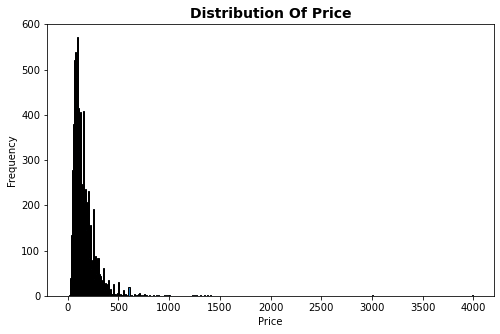

In [92]:
# start with a standard-scaled plot
binsize = 10
bins = np.arange(0, df_list_clean['price'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

myHistPlot(df_list_clean, 'price', bins)

If I exclude the top 5 % of the outliners I discover that most prices are between 50 and 150 Dollars.

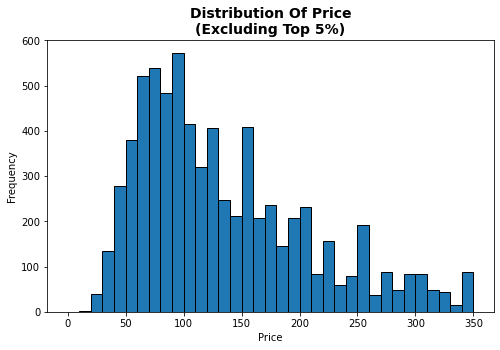

In [93]:
#without outliers (5%)

binsize = 10
bins = np.arange(0, df_list_clean['price'].quantile(0.95)+binsize, binsize)

plt.figure(figsize=[8,5])

myHistPlot(df_list_clean, 'price', bins)
plt.title('Distribution of price\n(excluding top 5%)'.title(), fontsize=14, weight='bold');

For the furhter investigation I only took the subset without the price outliners.

I found out that number of beds, bedtypes, number of bathrooms and bedrooms as well as clenaing_fee and the state are important for the price of an AirBNB room.

Especially interessting was that if the AirBNB has 2 bathrooms it is much more likely to have a really high price for the room.

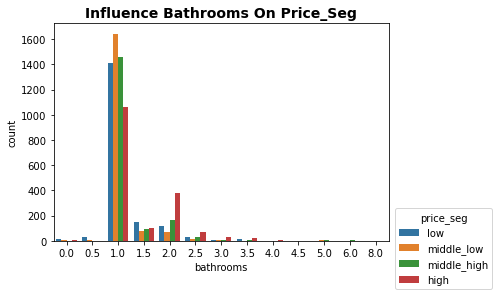

In [94]:
myplt(df_clean_sub, 'bathrooms', 'price_seg')

### 4.2 Are the reviews relevant for the price?

Again (as above) I only looked at the subdataset without the price outliners. After having a closer look at number of reviews, scores values and reviews per month I came to the conclusion that they aren't as influencial for the price as i suspected. 

But I discovered an other interesting fact: There aren't many reviews below 8, 10 beeing the highest score here. So the reviews in itself don't seem to be that relevant for the price.

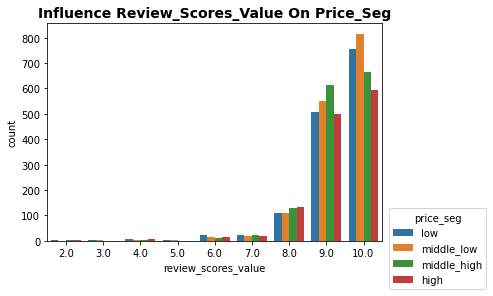

In [95]:
myplt(df_clean_sub, 'review_scores_value', 'price_seg')

### 4.3 Predicting the price for a new AirBNB room?

The first thing I did was checking if the price (which I want to predict) and the columns which I thought are responsible for the price are without nulls. After that I created dummy-Variables for those columns which are not a number (bed_type and state).

After splitting the data in test and train data, I used regression for prediction. I've got a r2 score of approyimately 0.4. so it seems there are other things that influence the price as well:

In [448]:
print('the r-squared score for this model is {} on {} values.'.format(r2, len(y_test)))

the r-squared score for this model is 0.4034393051232473 on 2112 values.
